# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

# Ваш код здесь

A = np.random.randint(10, size = (10, 10))
A

array([[2, 8, 2, 1, 0, 1, 9, 5, 3, 8],
       [2, 9, 7, 7, 6, 4, 2, 0, 5, 1],
       [3, 8, 1, 4, 4, 1, 2, 4, 7, 9],
       [7, 3, 9, 6, 6, 2, 9, 6, 0, 5],
       [4, 2, 7, 7, 9, 3, 2, 4, 8, 6],
       [6, 0, 7, 4, 8, 0, 5, 1, 3, 0],
       [4, 9, 0, 8, 4, 2, 4, 6, 9, 0],
       [1, 0, 8, 7, 2, 5, 4, 2, 7, 6],
       [6, 9, 4, 0, 8, 9, 1, 6, 4, 0],
       [1, 1, 0, 9, 7, 7, 4, 9, 5, 4]])

In [3]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь

mean_val = np.mean (A, 0)
mean_val

array([3.6, 4.9, 4.5, 5.3, 5.4, 3.4, 4.2, 4.3, 5.1, 3.9])

In [4]:
# Транспонируйте матрицу A

# Ваш код здесь

A_T = A.T
A_T

array([[2, 2, 3, 7, 4, 6, 4, 1, 6, 1],
       [8, 9, 8, 3, 2, 0, 9, 0, 9, 1],
       [2, 7, 1, 9, 7, 7, 0, 8, 4, 0],
       [1, 7, 4, 6, 7, 4, 8, 7, 0, 9],
       [0, 6, 4, 6, 9, 8, 4, 2, 8, 7],
       [1, 4, 1, 2, 3, 0, 2, 5, 9, 7],
       [9, 2, 2, 9, 2, 5, 4, 4, 1, 4],
       [5, 0, 4, 6, 4, 1, 6, 2, 6, 9],
       [3, 5, 7, 0, 8, 3, 9, 7, 4, 5],
       [8, 1, 9, 5, 6, 0, 0, 6, 0, 4]])

In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь

multiplication = A * A_T
multiplication

array([[ 4, 16,  6,  7,  0,  6, 36,  5, 18,  8],
       [16, 81, 56, 21, 12,  0, 18,  0, 45,  1],
       [ 6, 56,  1, 36, 28,  7,  0, 32, 28,  0],
       [ 7, 21, 36, 36, 42,  8, 72, 42,  0, 45],
       [ 0, 12, 28, 42, 81, 24,  8,  8, 64, 42],
       [ 6,  0,  7,  8, 24,  0, 10,  5, 27,  0],
       [36, 18,  0, 72,  8, 10, 16, 24,  9,  0],
       [ 5,  0, 32, 42,  8,  5, 24,  4, 42, 54],
       [18, 45, 28,  0, 64, 27,  9, 42, 16,  0],
       [ 8,  1,  0, 45, 42,  0,  0, 54,  0, 16]])

In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

# Ваш код здесь

dot_product = np.dot (A, A_T)
dot_product

array([[253, 142, 208, 215, 158,  89, 183, 145, 152, 154],
       [142, 265, 189, 213, 240, 162, 230, 188, 227, 181],
       [208, 189, 257, 191, 232, 108, 229, 171, 189, 197],
       [215, 213, 191, 357, 271, 228, 203, 221, 216, 230],
       [158, 240, 232, 271, 328, 211, 236, 250, 227, 261],
       [ 89, 162, 108, 228, 211, 200, 141, 149, 151, 142],
       [183, 230, 229, 203, 236, 141, 314, 169, 231, 242],
       [145, 188, 171, 221, 250, 149, 169, 248, 143, 206],
       [152, 227, 189, 216, 227, 151, 231, 143, 331, 212],
       [154, 181, 197, 230, 261, 142, 242, 206, 212, 319]])

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [7]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [8]:
# Ваш код здесь
# print (all_data)


delayed_data = all_data.sample (n=2000)
all_data = all_data.drop (index=delayed_data.index)

# print (all_data.shape(0))
# print (delayed_data.shape)
# print (delayed_data.index)
# print (all_data)


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [9]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

# print (labels)
# print ('--')
# print (feature_matrix)

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [11]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

# print (two_class_feature_matrix.shape)
# print (two_class_labels.shape)


In [12]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split (two_class_feature_matrix, two_class_labels, test_size=0.2)

# print (train_feature_matrix.shape)
# print (test_feature_matrix.shape)
# print (train_labels.shape)
# print (test_labels.shape)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [13]:
lr_clf = LogisticRegression()

In [14]:
# Ваш код здесь
lr_clf.fit(train_feature_matrix, train_labels)
print (lr_clf)

F1 = f1_score (test_labels, lr_clf.predict(test_feature_matrix))
ACC = accuracy_score (test_labels, lr_clf.predict(test_feature_matrix))
print ("Accuracy = ", ACC, "F1_score = ", F1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy =  0.7692867540029112 F1_score =  0.7278969957081544


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


In [15]:
from sklearn.model_selection import GridSearchCV

Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [16]:
# Ваш код здесь

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split (feature_matrix, labels, test_size=0.2, random_state=42)

lr_clf = LogisticRegression() # can change lib here to turn to multinomial

lr_clf.fit (train_feature_matrix, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [17]:
# Ваш код здесь

param_grid = {'C'      :np.linspace(0.01, 1, 10),
              'penalty':['l1', 'l2']}
grid_cv = GridSearchCV (lr_clf, param_grid, scoring='accuracy', cv=5)
# print ('gs_cv = ', grid_cv)
# grid_cv.get_params()

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [18]:
# Ваш код здесь

grid_cv.fit (train_feature_matrix, train_labels)
# grid_cv.score(test_feature_matrix, test_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/roma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/roma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/roma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/roma/anaconda3/lib/python3.7/si

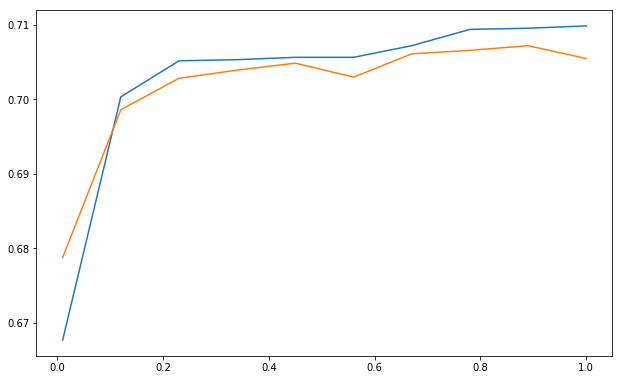

In [20]:
results = pd.DataFrame(grid_cv.cv_results_)

l1_res = results[results['param_penalty'] == 'l1']
l2_res = results[results['param_penalty'] == 'l2']

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(l1_res['param_C'], l1_res['mean_test_score'])
axes.plot(l2_res['param_C'], l2_res['mean_test_score'])

plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [21]:
# Ваш код здесь
print ('best score = ', grid_cv.best_score_)
print ('best params :', grid_cv.best_params_)

best score =  0.70984375
best params : {'C': 1.0, 'penalty': 'l1'}


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [22]:
# Ваш код здесь
# print (grid_cv.best_params_['C'])
# print (grid_cv.best_params_['penalty'])
best_lr_clf = LogisticRegression(C=grid_cv.best_params_['C'], penalty=grid_cv.best_params_['penalty'])

# print (train_feature_matrix)
# print (train_labels)

best_lr_clf.fit (train_feature_matrix, train_labels)

predictions = best_lr_clf.predict_proba(test_feature_matrix)
print (predictions)

[[2.73478243e-01 7.14958410e-01 1.35909874e-03 ... 3.52125730e-03
  4.96033906e-03 1.65424162e-03]
 [8.21980796e-01 1.75825586e-01 2.56267478e-05 ... 1.04477066e-04
  3.08760692e-05 2.00941083e-03]
 [5.63190367e-02 7.91474951e-01 1.32722314e-02 ... 1.17556101e-01
  2.08010372e-02 4.17300231e-04]
 ...
 [4.85312796e-01 4.99416602e-01 2.16058525e-04 ... 5.79267417e-04
  5.25474928e-04 1.39490642e-02]
 [2.01534567e-01 7.78671671e-01 2.90409298e-03 ... 1.39601271e-02
  1.87913198e-03 1.05009481e-03]
 [6.84560022e-02 9.04982669e-01 4.62061952e-03 ... 1.46156462e-02
  7.06616185e-03 2.08037341e-04]]


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [23]:
# Ваш код здесь
mean_probabilities = np.mean (predictions, axis=0)
print (mean_probabilities)

frequencies = np.zeros(7)

for i in range (labels.shape[0]):
    frequencies[labels[i] - 1] += 1
    
frequencies = frequencies / labels.shape[0]

for i in range (7):
    print (i, 'mean_prob = ', mean_probabilities[i], 'frequency = ', frequencies[i])

[0.37680215 0.48861347 0.05942569 0.00338768 0.01320946 0.02686036
 0.03170118]
0 mean_prob =  0.3768021501084904 frequency =  0.37
1 mean_prob =  0.48861347288647694 frequency =  0.48825
2 mean_prob =  0.05942568547344435 frequency =  0.05775
3 mean_prob =  0.003387681616296343 frequency =  0.005125
4 mean_prob =  0.013209463623646712 frequency =  0.015625
5 mean_prob =  0.026860363035338307 frequency =  0.02925
6 mean_prob =  0.031701183256306845 frequency =  0.034


Вероятности попадания почти совпадают с частотами меток 

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Ваш код здесь
knn_clf = KNeighborsClassifier(weights='distance')
knn_clf.fit (train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [25]:
# Ваш код здесь
param_grid = {'n_neighbors':np.arange(1, 11),
              'weights'     :['uniform', 'distance']}
grid_cv = GridSearchCV (knn_clf, param_grid, scoring='accuracy', cv=5)

In [26]:
grid_cv.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [27]:
# Ваш код здесь
print ('best score = ', grid_cv.best_score_)
print ('best params :', grid_cv.best_params_)

best score =  0.7453125
best params : {'n_neighbors': 4, 'weights': 'distance'}


/home/roma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/roma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/roma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/roma/anaconda3/lib/python3.7/si

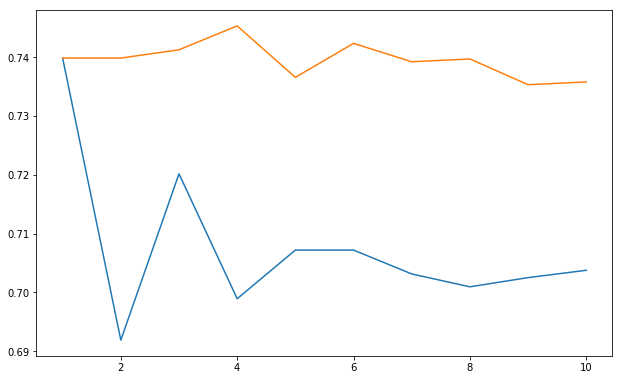

In [28]:
results = pd.DataFrame(grid_cv.cv_results_)
# print (results)

l1_res = results[results['param_weights'] == 'uniform']
l2_res = results[results['param_weights'] == 'distance']

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(l1_res['param_n_neighbors'], l1_res['mean_test_score'])
axes.plot(l2_res['param_n_neighbors'], l2_res['mean_test_score'])

plt.show()

In [29]:
best_knn_clf = KNeighborsClassifier(weights=grid_cv.best_params_['weights'], n_neighbors=grid_cv.best_params_['n_neighbors'])

# print (train_feature_matrix)
# print (train_labels)

best_knn_clf.fit (train_feature_matrix, train_labels)

predictions = best_knn_clf.predict_proba(test_feature_matrix)
print (predictions)

[[0.         1.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.74116375 0.         ... 0.25883625 0.         0.        ]
 ...
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.5304594  0.4695406  0.         ... 0.         0.         0.        ]
 [0.         0.67080986 0.32919014 ... 0.         0.         0.        ]]


In [30]:
mean_probabilities = np.mean (predictions, axis=0)
print (mean_probabilities)

frequencies = np.zeros(7)

for i in range (labels.shape[0]):
    frequencies[labels[i] - 1] += 1
    
frequencies = frequencies / labels.shape[0]

for i in range (7):
    print (i, 'mean_porb = ', mean_probabilities[i], 'frequency = ', frequencies[i])

[0.39579287 0.48135482 0.05799174 0.00486791 0.0117337  0.02402727
 0.0242317 ]
0 mean_porb =  0.3957928702891712 frequency =  0.37
1 mean_porb =  0.48135482045821953 frequency =  0.48825
2 mean_porb =  0.05799173549301033 frequency =  0.05775
3 mean_porb =  0.004867910217727046 frequency =  0.005125
4 mean_porb =  0.011733698822141717 frequency =  0.015625
5 mean_porb =  0.02402726833967912 frequency =  0.02925
6 mean_porb =  0.024231696380050974 frequency =  0.034


#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [31]:
# Ваш код здесь
delayed_labels         = delayed_data[all_data.columns[-1]].values
delayed_feature_matrix = delayed_data[all_data.columns[:-1]].values

# lnr_accuracy = best_lr_clf .predict_proba(delayed_feature_matrix)
# knn_accuracy = best_knn_clf.predict_proba(delayed_feature_matrix)

lnr_accuracy = accuracy_score (delayed_labels, best_lr_clf .predict(delayed_feature_matrix))
knn_accuracy = accuracy_score (delayed_labels, best_knn_clf.predict(delayed_feature_matrix))

print ('lnr_accuracy = ', lnr_accuracy, 'knn_accuracy = ', knn_accuracy)

lnr_accuracy =  0.6975 knn_accuracy =  0.7575


knn выбил лучший результат чем линейная регрессия